In [1]:
# Include libraries which may use in implementation
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle

%matplotlib inline


In [2]:
# Create a Neural_Network class
class Neural_Network(object):    
    def __init__(self,inputSize = 2,outputSize = 1 ):
        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize    
        self.W1 = np.random.rand(self.inputSize+1, self.outputSize)   

    def feedforward(self, X):

        z = np.dot(X, self.W1)
        activated_z = self.sigmoid(z)
        return activated_z

    def sigmoid(self, s):
        activated_output = 1 / (1 + (np.exp(-s)))
        return activated_output

    def sigmoid_derivative(self, s):
        der_sigmoid = s * (1 - s)
        return der_sigmoid 

    def backwardpropagate(self,X, Y, y_pred, lr):
        derivate_j =  (y_pred-Y)
        k = np.dot(np.transpose(X), derivate_j)
        self.W1 = self.W1 - (lr * k)
        return self.W1
    
    def crossentropy(self, Y, Y_pred):
        error_ce =  -np.sum((Y * np.log2(Y_pred)) + ((1-Y) * np.log2(1- Y_pred)))
        return error_ce 

    def train(self, trainX, trainY,epochs, learningRate, plot_err = True ,validationX = 'Null', validationY = 'Null'):
        train_error = []
        valid_error = []
        train_accu = []
        valid_accu = []
        for i in range(epochs):
            
            pred = self.feedforward(trainX)
            self.backwardpropagate(trainX, trainY, pred, learningRate)
            train_error.append( self.crossentropy(trainY, pred))
            if validationX != 'Null' and validationY != 'Null':
                val_pred = self.predict(validationX)
                valid_error.append(self.crossentropy(validationY, val_pred))
                valid_accu.append(self.accuracy(validationX, validationY))
            train_accu.append(self.accuracy(trainX, trainY))
            print ("epoch:",i, "training Loss:" ,train_error[-1], "validation Loss:" ,valid_error[-1],\
                   " valid acc:", valid_accu[-1], " train Acc:", train_accu[-1])
            
        self.curve_plot(epochs, train_error, valid_error, train_accu, valid_accu)
        
        
    def curve_plot(self, epochs, train_error, valid_error, train_accu, valid_accu):
        
        plt.legend(loc='best')
        plt.title("loss curve")
        plt.plot(range(epochs), train_error)
        plt.plot(range(epochs), valid_error)
        plt.show()     
        plt.legend(loc='best')
        plt.title("accuracy Curve")
        plt.plot(range(epochs), train_accu)
        plt.plot(range(epochs), valid_accu)
        plt.show()
#         print(train_accu[-1])
#         print(valid_accu[-1])
#         print(error[-1])

    def predict(self, testX):
        # predict the value of testX
        test_pred = self.feedforward(testX)
        return test_pred
    
    def accuracy(self, testX, testY):
        # predict the value of trainX
        test_pred = self.predict(testX)
        TP = 0
        TN = 0
        test_pred[test_pred>=0.5] = 1
        test_pred[test_pred<0.5] = 0
            
        x= np.mean(testY == test_pred)
        return x     
        
    def saveModel(self,name):
        np.save(name, self.W1)

    def loadModel(self,name):
        self.W1 = np.load(name, allow_pickle = True)

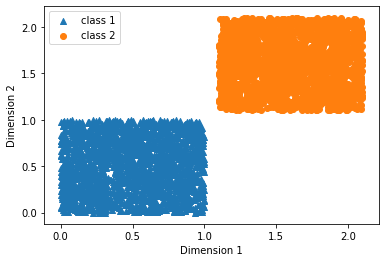

In [3]:
# generating dataset point
np.random.seed(1)
no_of_samples = 2000
dims = 2
#Generating random points of values between 0 to 1
class1=np.random.rand(no_of_samples,dims)
#To add separability we will add a bias of 1.1
class2=np.random.rand(no_of_samples,dims)+1.1
class_1_label=np.array([1 for n in range(no_of_samples)])
class_2_label=np.array([0 for n in range(no_of_samples)])
#Lets visualize the dataset
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

In [4]:
# Data concatenation
data = np.concatenate((class1,class2),axis=0)
label = np.concatenate((class_1_label,class_2_label),axis=0)

#Note: shuffle this dataset before dividing it into three parts
from sklearn.utils import shuffle
X, y = shuffle(data, label, random_state=0)
# Distribute this data into three parts i.e. training, validation and testing

trainX, validX, testX = X[:2800], X[2800:3400], X[3400:]
trainY, validY, testY = y[:2800], y[2800:3400], y[3400:]


trainY = np.expand_dims(trainY, axis=1)
testY = np.expand_dims(testY, axis=1)
validY = np.expand_dims(validY, axis=1)


In [5]:
m , n, o = len(trainX), len(validX), len(testX)
trainX = np.hstack((trainX, np.atleast_2d(np.ones(m)).T))
testX = np.hstack((testX, np.atleast_2d(np.ones(n)).T))
validX = np.hstack((validX, np.atleast_2d(np.ones(o)).T))

C:\Users\Mudasser Afzal\Anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


epoch: 0 training Loss: 5272.824289678203 validation Loss: 1107.9397722335927  valid acc: 0.49166666666666664  train Acc: 0.5014285714285714
epoch: 1 training Loss: 5163.4365371363365 validation Loss: 1085.0689315577492  valid acc: 0.49166666666666664  train Acc: 0.5014285714285714
epoch: 2 training Loss: 5056.324192486974 validation Loss: 1062.6988205314174  valid acc: 0.49166666666666664  train Acc: 0.5014285714285714
epoch: 3 training Loss: 4951.536924880023 validation Loss: 1040.839095901648  valid acc: 0.49166666666666664  train Acc: 0.5014285714285714
epoch: 4 training Loss: 4849.121114992826 validation Loss: 1019.4986063275567  valid acc: 0.49166666666666664  train Acc: 0.5014285714285714
epoch: 5 training Loss: 4749.1194330249045 validation Loss: 998.6853075105673  valid acc: 0.49166666666666664  train Acc: 0.5014285714285714
epoch: 6 training Loss: 4651.5704305737345 validation Loss: 978.4061821526091  valid acc: 0.49166666666666664  train Acc: 0.5014285714285714
epoch: 7 trai

epoch: 84 training Loss: 2209.466940557483 validation Loss: 477.6473696150733  valid acc: 0.785  train Acc: 0.7978571428571428
epoch: 85 training Loss: 2204.115177404213 validation Loss: 476.5445216871528  valid acc: 0.7833333333333333  train Acc: 0.7946428571428571
epoch: 86 training Loss: 2198.8767278764626 validation Loss: 475.4648618114886  valid acc: 0.78  train Acc: 0.7917857142857143
epoch: 87 training Loss: 2193.7462864527433 validation Loss: 474.40731376090514  valid acc: 0.7766666666666666  train Acc: 0.79
epoch: 88 training Loss: 2188.7188266886606 validation Loss: 473.37085750673657  valid acc: 0.7716666666666666  train Acc: 0.7871428571428571
epoch: 89 training Loss: 2183.7895857676185 validation Loss: 472.35452612374837  valid acc: 0.7716666666666666  train Acc: 0.7857142857142857
epoch: 90 training Loss: 2178.954049929181 validation Loss: 471.357402870575  valid acc: 0.77  train Acc: 0.7842857142857143
epoch: 91 training Loss: 2174.2079407264378 validation Loss: 470.3786

epoch: 166 training Loss: 1929.0791971345393 validation Loss: 419.8186084965863  valid acc: 0.785  train Acc: 0.7985714285714286
epoch: 167 training Loss: 1926.4583931732795 validation Loss: 419.2784537975325  valid acc: 0.7883333333333333  train Acc: 0.7996428571428571
epoch: 168 training Loss: 1923.845994445417 validation Loss: 418.740032628966  valid acc: 0.79  train Acc: 0.8
epoch: 169 training Loss: 1921.241885096414 validation Loss: 418.20332058210823  valid acc: 0.79  train Acc: 0.8014285714285714
epoch: 170 training Loss: 1918.6459535923586 validation Loss: 417.6682941480517  valid acc: 0.7916666666666666  train Acc: 0.8014285714285714
epoch: 171 training Loss: 1916.0580925290053 validation Loss: 417.1349306784319  valid acc: 0.7916666666666666  train Acc: 0.8021428571428572
epoch: 172 training Loss: 1913.4781984496767 validation Loss: 416.6032083479103  valid acc: 0.7916666666666666  train Acc: 0.8021428571428572
epoch: 173 training Loss: 1910.9061716715876 validation Loss: 41

epoch: 244 training Loss: 1744.7148060591594 validation Loss: 381.7959111367484  valid acc: 0.8616666666666667  train Acc: 0.8660714285714286
epoch: 245 training Loss: 1742.5734404310729 validation Loss: 381.35368573394544  valid acc: 0.8633333333333333  train Acc: 0.8667857142857143
epoch: 246 training Loss: 1740.4370290344477 validation Loss: 380.9124636245548  valid acc: 0.8633333333333333  train Acc: 0.8682142857142857
epoch: 247 training Loss: 1738.3055545121674 validation Loss: 380.47224118420377  valid acc: 0.8633333333333333  train Acc: 0.8685714285714285
epoch: 248 training Loss: 1736.1789996913478 validation Loss: 380.03301482926776  valid acc: 0.8633333333333333  train Acc: 0.8692857142857143
epoch: 249 training Loss: 1734.0573475773185 validation Loss: 379.59478101557045  valid acc: 0.8633333333333333  train Acc: 0.87
epoch: 250 training Loss: 1731.9405813478481 validation Loss: 379.15753623713624  valid acc: 0.8633333333333333  train Acc: 0.8710714285714286
epoch: 251 trai

epoch: 328 training Loss: 1580.6935158778592 validation Loss: 347.85384087850395  valid acc: 0.9116666666666666  train Acc: 0.9167857142857143
epoch: 329 training Loss: 1578.9185290098885 validation Loss: 347.4856476674046  valid acc: 0.9166666666666666  train Acc: 0.9167857142857143
epoch: 330 training Loss: 1577.1473818448374 validation Loss: 347.11822980655086  valid acc: 0.9166666666666666  train Acc: 0.9175
epoch: 331 training Loss: 1575.3800634992201 validation Loss: 346.7515851095715  valid acc: 0.9183333333333333  train Acc: 0.9175
epoch: 332 training Loss: 1573.6165631265744 validation Loss: 346.3857113980334  valid acc: 0.9183333333333333  train Acc: 0.9182142857142858
epoch: 333 training Loss: 1571.8568699172008 validation Loss: 346.02060650137554  valid acc: 0.9183333333333333  train Acc: 0.9192857142857143
epoch: 334 training Loss: 1570.1009730979044 validation Loss: 345.6562682568455  valid acc: 0.9183333333333333  train Acc: 0.9196428571428571
epoch: 335 training Loss: 1

epoch: 418 training Loss: 1435.130202360916 validation Loss: 317.5830170319641  valid acc: 0.9466666666666667  train Acc: 0.9457142857142857
epoch: 419 training Loss: 1433.6610793462278 validation Loss: 317.2766632464883  valid acc: 0.9466666666666667  train Acc: 0.9457142857142857
epoch: 420 training Loss: 1432.1949446415579 validation Loss: 316.97091477278127  valid acc: 0.9466666666666667  train Acc: 0.9457142857142857
epoch: 421 training Loss: 1430.7317900778626 validation Loss: 316.6657699846687  valid acc: 0.9466666666666667  train Acc: 0.9460714285714286
epoch: 422 training Loss: 1429.271607511599 validation Loss: 316.36122726108135  valid acc: 0.9466666666666667  train Acc: 0.9460714285714286
epoch: 423 training Loss: 1427.814388824645 validation Loss: 316.05728498603736  valid acc: 0.9466666666666667  train Acc: 0.9464285714285714
epoch: 424 training Loss: 1426.3601259242191 validation Loss: 315.75394154862465  valid acc: 0.9466666666666667  train Acc: 0.9467857142857142
epoch

epoch: 511 training Loss: 1310.2961832014676 validation Loss: 291.4846601833987  valid acc: 0.96  train Acc: 0.9635714285714285
epoch: 512 training Loss: 1309.0731144349784 validation Loss: 291.22825830006127  valid acc: 0.96  train Acc: 0.9635714285714285
epoch: 513 training Loss: 1307.8523736730501 validation Loss: 290.9723302504177  valid acc: 0.96  train Acc: 0.9635714285714285
epoch: 514 training Loss: 1306.6339548058143 validation Loss: 290.7168748164596  valid acc: 0.96  train Acc: 0.9635714285714285
epoch: 515 training Loss: 1305.4178517423875 validation Loss: 290.4618907839178  valid acc: 0.96  train Acc: 0.9635714285714285
epoch: 516 training Loss: 1304.204058410808 validation Loss: 290.2073769422508  valid acc: 0.9616666666666667  train Acc: 0.9635714285714285
epoch: 517 training Loss: 1302.9925687579746 validation Loss: 289.95333208463194  valid acc: 0.9616666666666667  train Acc: 0.9639285714285715
epoch: 518 training Loss: 1301.7833767495856 validation Loss: 289.699755007

epoch: 605 training Loss: 1204.7390769741146 validation Loss: 269.30150114637127  valid acc: 0.9733333333333334  train Acc: 0.9710714285714286
epoch: 606 training Loss: 1203.710500107237 validation Loss: 269.0847814367703  valid acc: 0.9733333333333334  train Acc: 0.9710714285714286
epoch: 607 training Loss: 1202.683752134193 validation Loss: 268.86843587431224  valid acc: 0.975  train Acc: 0.9710714285714286
epoch: 608 training Loss: 1201.6588284821792 validation Loss: 268.6524635435397  valid acc: 0.975  train Acc: 0.9714285714285714
epoch: 609 training Loss: 1200.6357245922973 validation Loss: 268.43686353173314  valid acc: 0.975  train Acc: 0.9714285714285714
epoch: 610 training Loss: 1199.6144359195068 validation Loss: 268.2216349289023  valid acc: 0.975  train Acc: 0.9714285714285714
epoch: 611 training Loss: 1198.5949579325793 validation Loss: 268.0067768277765  valid acc: 0.975  train Acc: 0.9714285714285714
epoch: 612 training Loss: 1197.5772861140515 validation Loss: 267.7922

epoch: 697 training Loss: 1117.228171350834 validation Loss: 250.8217291788581  valid acc: 0.98  train Acc: 0.98
epoch: 698 training Loss: 1116.350334333878 validation Loss: 250.6359187856738  valid acc: 0.98  train Acc: 0.98
epoch: 699 training Loss: 1115.473958282072 validation Loss: 250.4504087184482  valid acc: 0.98  train Acc: 0.98
epoch: 700 training Loss: 1114.59903972515 validation Loss: 250.2651982791589  valid acc: 0.98  train Acc: 0.98
epoch: 701 training Loss: 1113.7255752030587 validation Loss: 250.08028677180207  valid acc: 0.98  train Acc: 0.98
epoch: 702 training Loss: 1112.8535612659248 validation Loss: 249.8956735023855  valid acc: 0.98  train Acc: 0.98
epoch: 703 training Loss: 1111.9829944740213 validation Loss: 249.71135777892226  valid acc: 0.98  train Acc: 0.98
epoch: 704 training Loss: 1111.113871397733 validation Loss: 249.52733891142387  valid acc: 0.98  train Acc: 0.98
epoch: 705 training Loss: 1110.2461886175233 validation Loss: 249.34361621189407  valid acc

epoch: 790 training Loss: 1041.417152184634 validation Loss: 234.74114228798337  valid acc: 0.9816666666666667  train Acc: 0.985
epoch: 791 training Loss: 1040.6615708885613 validation Loss: 234.5805197315958  valid acc: 0.9816666666666667  train Acc: 0.985
epoch: 792 training Loss: 1039.9071674209758 validation Loss: 234.42014042100914  valid acc: 0.9816666666666667  train Acc: 0.985
epoch: 793 training Loss: 1039.1539391299702 validation Loss: 234.2600038202603  valid acc: 0.9816666666666667  train Acc: 0.985
epoch: 794 training Loss: 1038.40188337114 validation Loss: 234.10010939487583  valid acc: 0.9816666666666667  train Acc: 0.985
epoch: 795 training Loss: 1037.6509975075596 validation Loss: 233.9404566118671  valid acc: 0.9816666666666667  train Acc: 0.985
epoch: 796 training Loss: 1036.9012789097585 validation Loss: 233.7810449397252  valid acc: 0.9816666666666667  train Acc: 0.985
epoch: 797 training Loss: 1036.1527249556952 validation Loss: 233.62187384841667  valid acc: 0.98

epoch: 884 training Loss: 975.2069265546822 validation Loss: 220.63829843352718  valid acc: 0.9866666666666667  train Acc: 0.9892857142857143
epoch: 885 training Loss: 974.5514050108327 validation Loss: 220.49838417406949  valid acc: 0.9866666666666667  train Acc: 0.9892857142857143
epoch: 886 training Loss: 973.896841767844 validation Loss: 220.35866869468867  valid acc: 0.9866666666666667  train Acc: 0.9892857142857143
epoch: 887 training Loss: 973.2432347824627 validation Loss: 220.21915158051692  valid acc: 0.9866666666666667  train Acc: 0.9892857142857143
epoch: 888 training Loss: 972.5905820169708 validation Loss: 220.07983241779027  valid acc: 0.9866666666666667  train Acc: 0.9892857142857143
epoch: 889 training Loss: 971.9388814391668 validation Loss: 219.94071079384526  valid acc: 0.9866666666666667  train Acc: 0.9892857142857143
epoch: 890 training Loss: 971.2881310223496 validation Loss: 219.80178629711546  valid acc: 0.9866666666666667  train Acc: 0.9896428571428572
epoch: 

epoch: 978 training Loss: 917.5187082233798 validation Loss: 208.30280112779434  valid acc: 0.9866666666666667  train Acc: 0.9925
epoch: 979 training Loss: 916.9450273085301 validation Loss: 208.1798968602134  valid acc: 0.9866666666666667  train Acc: 0.9925
epoch: 980 training Loss: 916.3721346370749 validation Loss: 208.05715677109467  valid acc: 0.9866666666666667  train Acc: 0.9925
epoch: 981 training Loss: 915.8000286166888 validation Loss: 207.93458053570524  valid acc: 0.9866666666666667  train Acc: 0.9925
epoch: 982 training Loss: 915.2287076591685 validation Loss: 207.81216783013818  valid acc: 0.9866666666666667  train Acc: 0.9925
epoch: 983 training Loss: 914.6581701804199 validation Loss: 207.68991833130997  valid acc: 0.9866666666666667  train Acc: 0.9925
epoch: 984 training Loss: 914.088414600445 validation Loss: 207.56783171695787  valid acc: 0.9866666666666667  train Acc: 0.9925
epoch: 985 training Loss: 913.5194393433304 validation Loss: 207.44590766563775  valid acc: 

epoch: 1071 training Loss: 867.343266366986 validation Loss: 197.53520805083343  valid acc: 0.99  train Acc: 0.995
epoch: 1072 training Loss: 866.8365801369955 validation Loss: 197.4262834645887  valid acc: 0.99  train Acc: 0.995
epoch: 1073 training Loss: 866.3305501722209 validation Loss: 197.31749608866562  valid acc: 0.99  train Acc: 0.995
epoch: 1074 training Loss: 865.8251752146796 validation Loss: 197.20884566546266  valid acc: 0.99  train Acc: 0.995
epoch: 1075 training Loss: 865.3204540095008 validation Loss: 197.10033193800422  valid acc: 0.99  train Acc: 0.995
epoch: 1076 training Loss: 864.8163853049157 validation Loss: 196.99195464993912  valid acc: 0.99  train Acc: 0.995
epoch: 1077 training Loss: 864.312967852248 validation Loss: 196.88371354553854  valid acc: 0.99  train Acc: 0.995
epoch: 1078 training Loss: 863.8102004059043 validation Loss: 196.77560836969423  valid acc: 0.99  train Acc: 0.995
epoch: 1079 training Loss: 863.3080817233669 validation Loss: 196.667638867

epoch: 1166 training Loss: 821.9735711813996 validation Loss: 187.7662529033108  valid acc: 0.995  train Acc: 0.9967857142857143
epoch: 1167 training Loss: 821.5240162415744 validation Loss: 187.6692942847423  valid acc: 0.995  train Acc: 0.9967857142857143
epoch: 1168 training Loss: 821.0750107665656 validation Loss: 187.57245096511332  valid acc: 0.995  train Acc: 0.9967857142857143
epoch: 1169 training Loss: 820.6265537567518 validation Loss: 187.47572273891956  valid acc: 0.995  train Acc: 0.9967857142857143
epoch: 1170 training Loss: 820.1786442148706 validation Loss: 187.37910940113363  valid acc: 0.995  train Acc: 0.9967857142857143
epoch: 1171 training Loss: 819.7312811460129 validation Loss: 187.2826107472037  valid acc: 0.995  train Acc: 0.9967857142857143
epoch: 1172 training Loss: 819.2844635576158 validation Loss: 187.1862265730521  valid acc: 0.995  train Acc: 0.9967857142857143
epoch: 1173 training Loss: 818.8381904594562 validation Loss: 187.089956675074  valid acc: 0.9

epoch: 1260 training Loss: 781.989968477994 validation Loss: 179.12995198423434  valid acc: 0.9966666666666667  train Acc: 0.9971428571428571
epoch: 1261 training Loss: 781.5879908439827 validation Loss: 179.04299327530862  valid acc: 0.9966666666666667  train Acc: 0.9971428571428571
epoch: 1262 training Loss: 781.1864781868944 validation Loss: 178.95613246542297  valid acc: 0.9966666666666667  train Acc: 0.9971428571428571
epoch: 1263 training Loss: 780.785429702272 validation Loss: 178.86936938858798  valid acc: 0.9966666666666667  train Acc: 0.9971428571428571
epoch: 1264 training Loss: 780.3848445874723 validation Loss: 178.7827038791823  valid acc: 0.9966666666666667  train Acc: 0.9971428571428571
epoch: 1265 training Loss: 779.9847220416616 validation Loss: 178.69613577195173  valid acc: 0.9966666666666667  train Acc: 0.9971428571428571
epoch: 1266 training Loss: 779.5850612658107 validation Loss: 178.60966490200815  valid acc: 0.9966666666666667  train Acc: 0.9971428571428571
ep

epoch: 1346 training Loss: 749.0407417344189 validation Loss: 171.99308522894648  valid acc: 0.9966666666666667  train Acc: 0.9978571428571429
epoch: 1347 training Loss: 748.6759874960343 validation Loss: 171.91397481614973  valid acc: 0.9966666666666667  train Acc: 0.9978571428571429
epoch: 1348 training Loss: 748.3116352066149 validation Loss: 171.83494927748848  valid acc: 0.9966666666666667  train Acc: 0.9978571428571429
epoch: 1349 training Loss: 747.9476842011027 validation Loss: 171.75600847530143  valid acc: 0.9966666666666667  train Acc: 0.9978571428571429
epoch: 1350 training Loss: 747.584133815879 validation Loss: 171.67715227222058  valid acc: 0.9966666666666667  train Acc: 0.9978571428571429
epoch: 1351 training Loss: 747.2209833887616 validation Loss: 171.5983805311701  valid acc: 0.9966666666666667  train Acc: 0.9978571428571429
epoch: 1352 training Loss: 746.8582322590001 validation Loss: 171.51969311536584  valid acc: 0.9966666666666667  train Acc: 0.9978571428571429
e

epoch: 1435 training Loss: 718.0794843984722 validation Loss: 165.26967759327815  valid acc: 0.9966666666666667  train Acc: 0.9982142857142857
epoch: 1436 training Loss: 717.7480539530322 validation Loss: 165.19761341614512  valid acc: 0.9966666666666667  train Acc: 0.9982142857142857
epoch: 1437 training Loss: 717.416971500444 validation Loss: 165.12562292796594  valid acc: 0.9966666666666667  train Acc: 0.9982142857142857
epoch: 1438 training Loss: 717.0862364901591 validation Loss: 165.0537060144282  valid acc: 0.9966666666666667  train Acc: 0.9982142857142857
epoch: 1439 training Loss: 716.7558483727712 validation Loss: 164.98186256145294  valid acc: 0.9966666666666667  train Acc: 0.9982142857142857
epoch: 1440 training Loss: 716.4258066000157 validation Loss: 164.9100924551943  valid acc: 0.9966666666666667  train Acc: 0.9982142857142857
epoch: 1441 training Loss: 716.0961106247647 validation Loss: 164.8383955820387  valid acc: 0.9966666666666667  train Acc: 0.9982142857142857
epo

epoch: 1523 training Loss: 690.1878638403393 validation Loss: 159.19808973746018  valid acc: 0.9966666666666667  train Acc: 0.9985714285714286
epoch: 1524 training Loss: 689.8850682901821 validation Loss: 159.13209693030058  valid acc: 0.9966666666666667  train Acc: 0.9985714285714286
epoch: 1525 training Loss: 689.5825763620103 validation Loss: 159.06616858628013  valid acc: 0.9966666666666667  train Acc: 0.9985714285714286
epoch: 1526 training Loss: 689.2803875956666 validation Loss: 159.00030460957723  valid acc: 0.9966666666666667  train Acc: 0.9985714285714286
epoch: 1527 training Loss: 688.9785015319115 validation Loss: 158.9345049045585  valid acc: 0.9966666666666667  train Acc: 0.9985714285714286
epoch: 1528 training Loss: 688.6769177124211 validation Loss: 158.8687693757782  valid acc: 0.9966666666666667  train Acc: 0.9985714285714286
epoch: 1529 training Loss: 688.3756356797849 validation Loss: 158.8030979279777  valid acc: 0.9966666666666667  train Acc: 0.9985714285714286
ep

epoch: 1605 training Loss: 666.327752433159 validation Loss: 153.99259275222528  valid acc: 0.9983333333333333  train Acc: 0.9989285714285714
epoch: 1606 training Loss: 666.0484032472468 validation Loss: 153.93158359843306  valid acc: 0.9983333333333333  train Acc: 0.9989285714285714
epoch: 1607 training Loss: 665.769322811162 validation Loss: 153.8706316370979  valid acc: 0.9983333333333333  train Acc: 0.9989285714285714
epoch: 1608 training Loss: 665.4905107331078 validation Loss: 153.80973678642397  valid acc: 0.9983333333333333  train Acc: 0.9989285714285714
epoch: 1609 training Loss: 665.2119666220412 validation Loss: 153.7488989647704  valid acc: 0.9983333333333333  train Acc: 0.9989285714285714
epoch: 1610 training Loss: 664.933690087671 validation Loss: 153.68811809065065  valid acc: 0.9983333333333333  train Acc: 0.9989285714285714
epoch: 1611 training Loss: 664.6556807404562 validation Loss: 153.6273940827324  valid acc: 0.9983333333333333  train Acc: 0.9989285714285714
epoch

epoch: 1695 training Loss: 642.2184908606064 validation Loss: 148.7215957301148  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1696 training Loss: 641.9618442079902 validation Loss: 148.66542361639404  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1697 training Loss: 641.7054338645789 validation Loss: 148.609301913682  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1698 training Loss: 641.4492594998142 validation Loss: 148.5532305527829  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1699 training Loss: 641.1933207837492 validation Loss: 148.49720946462702  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1700 training Loss: 640.9376173870473 validation Loss: 148.4412385802702  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1701 training Loss: 640.6821489809806 validation Loss: 148.38531783089394  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoc

epoch: 1774 training Loss: 622.6462221023264 validation Loss: 144.43402627104467  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1775 training Loss: 622.4072717700894 validation Loss: 144.38163298990003  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1776 training Loss: 622.1685334121357 validation Loss: 144.32928502020337  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1777 training Loss: 621.9300067422018 validation Loss: 144.27698230189696  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1778 training Loss: 621.6916914745362 validation Loss: 144.22472477502902  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1779 training Loss: 621.4535873238984 validation Loss: 144.17251237975324  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572
epoch: 1780 training Loss: 621.2156940055578 validation Loss: 144.12034505632863  valid acc: 0.9983333333333333  train Acc: 0.9996428571428572

epoch: 1855 training Loss: 603.9544418709587 validation Loss: 140.3320257584428  valid acc: 1.0  train Acc: 1.0
epoch: 1856 training Loss: 603.7317758485373 validation Loss: 140.28311677499465  valid acc: 1.0  train Acc: 1.0
epoch: 1857 training Loss: 603.5093001805944 validation Loss: 140.23424856236778  valid acc: 1.0  train Acc: 1.0
epoch: 1858 training Loss: 603.2870146189242 validation Loss: 140.18542106837492  valid acc: 1.0  train Acc: 1.0
epoch: 1859 training Loss: 603.0649189157507 validation Loss: 140.13663424091774  valid acc: 1.0  train Acc: 1.0
epoch: 1860 training Loss: 602.843012823726 validation Loss: 140.0878880279866  valid acc: 1.0  train Acc: 1.0
epoch: 1861 training Loss: 602.6212960959301 validation Loss: 140.03918237766044  valid acc: 1.0  train Acc: 1.0
epoch: 1862 training Loss: 602.3997684858698 validation Loss: 139.9905172381065  valid acc: 1.0  train Acc: 1.0
epoch: 1863 training Loss: 602.1784297474771 validation Loss: 139.94189255758022  valid acc: 1.0  tr

epoch: 1942 training Loss: 585.2692285543696 validation Loss: 136.2241274676534  valid acc: 1.0  train Acc: 1.0
epoch: 1943 training Loss: 585.0622383912056 validation Loss: 136.17857933692818  valid acc: 1.0  train Acc: 1.0
epoch: 1944 training Loss: 584.855418502769 validation Loss: 136.1330677504838  valid acc: 1.0  train Acc: 1.0
epoch: 1945 training Loss: 584.6487686750128 validation Loss: 136.08759266321402  valid acc: 1.0  train Acc: 1.0
epoch: 1946 training Loss: 584.4422886942475 validation Loss: 136.04215403008675  valid acc: 1.0  train Acc: 1.0
epoch: 1947 training Loss: 584.2359783471403 validation Loss: 135.996751806144  valid acc: 1.0  train Acc: 1.0
epoch: 1948 training Loss: 584.0298374207149 validation Loss: 135.95138594650163  valid acc: 1.0  train Acc: 1.0
epoch: 1949 training Loss: 583.8238657023498 validation Loss: 135.90605640634936  valid acc: 1.0  train Acc: 1.0
epoch: 1950 training Loss: 583.618062979779 validation Loss: 135.86076314095052  valid acc: 1.0  trai

epoch: 2026 training Loss: 568.4559051543017 validation Loss: 132.52131862247515  valid acc: 1.0  train Acc: 1.0
epoch: 2027 training Loss: 568.262504600611 validation Loss: 132.4786897617092  valid acc: 1.0  train Acc: 1.0
epoch: 2028 training Loss: 568.0692575211729 validation Loss: 132.4360939012828  valid acc: 1.0  train Acc: 1.0
epoch: 2029 training Loss: 567.8761637295644 validation Loss: 132.39353100182947  valid acc: 1.0  train Acc: 1.0
epoch: 2030 training Loss: 567.683223039664 validation Loss: 132.35100102404553  valid acc: 1.0  train Acc: 1.0
epoch: 2031 training Loss: 567.4904352656511 validation Loss: 132.30850392868987  valid acc: 1.0  train Acc: 1.0
epoch: 2032 training Loss: 567.2978002220051 validation Loss: 132.26603967658372  valid acc: 1.0  train Acc: 1.0
epoch: 2033 training Loss: 567.1053177235049 validation Loss: 132.22360822861074  valid acc: 1.0  train Acc: 1.0
epoch: 2034 training Loss: 566.9129875852286 validation Loss: 132.18120954571674  valid acc: 1.0  tr

epoch: 2111 training Loss: 552.5469391887102 validation Loss: 129.011911443425  valid acc: 1.0  train Acc: 1.0
epoch: 2112 training Loss: 552.3659470056155 validation Loss: 128.971953023712  valid acc: 1.0  train Acc: 1.0
epoch: 2113 training Loss: 552.1850934698555 validation Loss: 128.93202447032485  valid acc: 1.0  train Acc: 1.0
epoch: 2114 training Loss: 552.0043784186028 validation Loss: 128.8921257488107  valid acc: 1.0  train Acc: 1.0
epoch: 2115 training Loss: 551.8238016892842 validation Loss: 128.8522568247698  valid acc: 1.0  train Acc: 1.0
epoch: 2116 training Loss: 551.6433631195811 validation Loss: 128.8124176638555  valid acc: 1.0  train Acc: 1.0
epoch: 2117 training Loss: 551.4630625474288 validation Loss: 128.77260823177397  valid acc: 1.0  train Acc: 1.0
epoch: 2118 training Loss: 551.2828998110153 validation Loss: 128.73282849428423  valid acc: 1.0  train Acc: 1.0
epoch: 2119 training Loss: 551.1028747487827 validation Loss: 128.69307841719802  valid acc: 1.0  train

epoch: 2203 training Loss: 536.4562766285775 validation Loss: 125.45657427007797  valid acc: 1.0  train Acc: 1.0
epoch: 2204 training Loss: 536.2873890747264 validation Loss: 125.41922573051367  valid acc: 1.0  train Acc: 1.0
epoch: 2205 training Loss: 536.1186261956367 validation Loss: 125.38190409782429  valid acc: 1.0  train Acc: 1.0
epoch: 2206 training Loss: 535.9499878499884 validation Loss: 125.3446093420457  valid acc: 1.0  train Acc: 1.0
epoch: 2207 training Loss: 535.7814738966749 validation Loss: 125.30734143325854  valid acc: 1.0  train Acc: 1.0
epoch: 2208 training Loss: 535.6130841948033 validation Loss: 125.27010034158796  valid acc: 1.0  train Acc: 1.0
epoch: 2209 training Loss: 535.4448186036932 validation Loss: 125.2328860372036  valid acc: 1.0  train Acc: 1.0
epoch: 2210 training Loss: 535.276676982877 validation Loss: 125.19569849031953  valid acc: 1.0  train Acc: 1.0
epoch: 2211 training Loss: 535.1086591920991 validation Loss: 125.15853767119413  valid acc: 1.0  t

epoch: 2297 training Loss: 521.1074872628006 validation Loss: 122.05953678076668  valid acc: 1.0  train Acc: 1.0
epoch: 2298 training Loss: 520.9497288982072 validation Loss: 122.02459225777719  valid acc: 1.0  train Acc: 1.0
epoch: 2299 training Loss: 520.7920828072865 validation Loss: 121.98967200967343  valid acc: 1.0  train Acc: 1.0
epoch: 2300 training Loss: 520.6345488671673 validation Loss: 121.95477601035037  valid acc: 1.0  train Acc: 1.0
epoch: 2301 training Loss: 520.4771269551585 validation Loss: 121.91990423374065  valid acc: 1.0  train Acc: 1.0
epoch: 2302 training Loss: 520.319816948748 validation Loss: 121.88505665381439  valid acc: 1.0  train Acc: 1.0
epoch: 2303 training Loss: 520.1626187256027 validation Loss: 121.85023324457924  valid acc: 1.0  train Acc: 1.0
epoch: 2304 training Loss: 520.0055321635687 validation Loss: 121.81543398008024  valid acc: 1.0  train Acc: 1.0
epoch: 2305 training Loss: 519.8485571406693 validation Loss: 121.7806588343998  valid acc: 1.0  

epoch: 2394 training Loss: 506.3101580319352 validation Loss: 118.77921911312299  valid acc: 1.0  train Acc: 1.0
epoch: 2395 training Loss: 506.1627435229698 validation Loss: 118.74651303011903  valid acc: 1.0  train Acc: 1.0
epoch: 2396 training Loss: 506.0154301597297 validation Loss: 118.71382885547465  valid acc: 1.0  train Acc: 1.0
epoch: 2397 training Loss: 505.8682178353458 validation Loss: 118.68116656643926  valid acc: 1.0  train Acc: 1.0
epoch: 2398 training Loss: 505.7211064431 validation Loss: 118.64852614029397  valid acc: 1.0  train Acc: 1.0
epoch: 2399 training Loss: 505.57409587642496 validation Loss: 118.61590755435157  valid acc: 1.0  train Acc: 1.0
epoch: 2400 training Loss: 505.42718602890363 validation Loss: 118.5833107859564  valid acc: 1.0  train Acc: 1.0
epoch: 2401 training Loss: 505.2803767942695 validation Loss: 118.5507358124843  valid acc: 1.0  train Acc: 1.0
epoch: 2402 training Loss: 505.1336680664059 validation Loss: 118.51818261134264  valid acc: 1.0  t

epoch: 2490 training Loss: 492.6048061130559 validation Loss: 115.73618867460739  valid acc: 1.0  train Acc: 1.0
epoch: 2491 training Loss: 492.4666349964843 validation Loss: 115.70548640329287  valid acc: 1.0  train Acc: 1.0
epoch: 2492 training Loss: 492.3285554186038 validation Loss: 115.67480399328886  valid acc: 1.0  train Acc: 1.0
epoch: 2493 training Loss: 492.1905672859059 validation Loss: 115.64414142465148  valid acc: 1.0  train Acc: 1.0
epoch: 2494 training Loss: 492.0526705050099 validation Loss: 115.61349867746378  valid acc: 1.0  train Acc: 1.0
epoch: 2495 training Loss: 491.914864982663 validation Loss: 115.5828757318356  valid acc: 1.0  train Acc: 1.0
epoch: 2496 training Loss: 491.77715062573964 validation Loss: 115.55227256790363  valid acc: 1.0  train Acc: 1.0
epoch: 2497 training Loss: 491.6395273412414 validation Loss: 115.52168916583126  valid acc: 1.0  train Acc: 1.0
epoch: 2498 training Loss: 491.5019950362971 validation Loss: 115.49112550580865  valid acc: 1.0 

epoch: 2585 training Loss: 479.8747221465345 validation Loss: 112.90547618144704  valid acc: 1.0  train Acc: 1.0
epoch: 2586 training Loss: 479.74484672051926 validation Loss: 112.8765752682919  valid acc: 1.0  train Acc: 1.0
epoch: 2587 training Loss: 479.6150544920247 validation Loss: 112.84769243585879  valid acc: 1.0  train Acc: 1.0
epoch: 2588 training Loss: 479.4853453787755 validation Loss: 112.8188276665684  valid acc: 1.0  train Acc: 1.0
epoch: 2589 training Loss: 479.3557192986052 validation Loss: 112.78998094286425  valid acc: 1.0  train Acc: 1.0
epoch: 2590 training Loss: 479.2261761694564 validation Loss: 112.76115224721289  valid acc: 1.0  train Acc: 1.0
epoch: 2591 training Loss: 479.09671590937995 validation Loss: 112.73234156210371  valid acc: 1.0  train Acc: 1.0
epoch: 2592 training Loss: 478.9673384365358 validation Loss: 112.70354887004899  valid acc: 1.0  train Acc: 1.0
epoch: 2593 training Loss: 478.83804366919156 validation Loss: 112.67477415358378  valid acc: 1.

epoch: 2681 training Loss: 467.7746578972492 validation Loss: 110.21099894876744  valid acc: 1.0  train Acc: 1.0
epoch: 2682 training Loss: 467.6524092565158 validation Loss: 110.18375678469718  valid acc: 1.0  train Acc: 1.0
epoch: 2683 training Loss: 467.53023638738483 validation Loss: 110.15653111334917  valid acc: 1.0  train Acc: 1.0
epoch: 2684 training Loss: 467.4081392172734 validation Loss: 110.12932191918819  valid acc: 1.0  train Acc: 1.0
epoch: 2685 training Loss: 467.286117673692 validation Loss: 110.1021291866986  valid acc: 1.0  train Acc: 1.0
epoch: 2686 training Loss: 467.16417168424425 validation Loss: 110.07495290038452  valid acc: 1.0  train Acc: 1.0
epoch: 2687 training Loss: 467.04230117662667 validation Loss: 110.04779304476965  valid acc: 1.0  train Acc: 1.0
epoch: 2688 training Loss: 466.92050607862836 validation Loss: 110.02064960439728  valid acc: 1.0  train Acc: 1.0
epoch: 2689 training Loss: 466.79878631813153 validation Loss: 109.99352256383025  valid acc: 

epoch: 2773 training Loss: 456.8361013095923 validation Loss: 107.7718609774252  valid acc: 1.0  train Acc: 1.0
epoch: 2774 training Loss: 456.7205311299456 validation Loss: 107.74607350071923  valid acc: 1.0  train Acc: 1.0
epoch: 2775 training Loss: 456.6050304165914 validation Loss: 107.72030116612913  valid acc: 1.0  train Acc: 1.0
epoch: 2776 training Loss: 456.4895991049335 validation Loss: 107.69454395980699  valid acc: 1.0  train Acc: 1.0
epoch: 2777 training Loss: 456.37423713045666 validation Loss: 107.66880186792208  valid acc: 1.0  train Acc: 1.0
epoch: 2778 training Loss: 456.2589444287257 validation Loss: 107.64307487666059  valid acc: 1.0  train Acc: 1.0
epoch: 2779 training Loss: 456.14372093538645 validation Loss: 107.61736297222578  valid acc: 1.0  train Acc: 1.0
epoch: 2780 training Loss: 456.0285665861643 validation Loss: 107.59166614083782  valid acc: 1.0  train Acc: 1.0
epoch: 2781 training Loss: 455.9134813168651 validation Loss: 107.56598436873384  valid acc: 1.

epoch: 2865 training Loss: 446.48653794696435 validation Loss: 105.46110538094375  valid acc: 1.0  train Acc: 1.0
epoch: 2866 training Loss: 446.3770980509635 validation Loss: 105.43665508158807  valid acc: 1.0  train Acc: 1.0
epoch: 2867 training Loss: 446.26772200072753 validation Loss: 105.41221871854044  valid acc: 1.0  train Acc: 1.0
epoch: 2868 training Loss: 446.15840973857894 validation Loss: 105.38779627941729  valid acc: 1.0  train Acc: 1.0
epoch: 2869 training Loss: 446.0491612069107 validation Loss: 105.36338775184988  valid acc: 1.0  train Acc: 1.0
epoch: 2870 training Loss: 445.93997634818516 validation Loss: 105.33899312348422  valid acc: 1.0  train Acc: 1.0
epoch: 2871 training Loss: 445.8308551049347 validation Loss: 105.31461238198116  valid acc: 1.0  train Acc: 1.0
epoch: 2872 training Loss: 445.7217974197613 validation Loss: 105.29024551501628  valid acc: 1.0  train Acc: 1.0
epoch: 2873 training Loss: 445.61280323533657 validation Loss: 105.2658925102799  valid acc:

epoch: 2957 training Loss: 436.678273219807 validation Loss: 103.26850044860154  valid acc: 1.0  train Acc: 1.0
epoch: 2958 training Loss: 436.5744741976979 validation Loss: 103.245282253218  valid acc: 1.0  train Acc: 1.0
epoch: 2959 training Loss: 436.47073399516944 validation Loss: 103.22207691421988  valid acc: 1.0  train Acc: 1.0
epoch: 2960 training Loss: 436.36705256056155 validation Loss: 103.19888442049913  valid acc: 1.0  train Acc: 1.0
epoch: 2961 training Loss: 436.2634298422748 validation Loss: 103.17570476096063  valid acc: 1.0  train Acc: 1.0
epoch: 2962 training Loss: 436.15986578877096 validation Loss: 103.15253792452216  valid acc: 1.0  train Acc: 1.0
epoch: 2963 training Loss: 436.05636034857247 validation Loss: 103.12938390011445  valid acc: 1.0  train Acc: 1.0
epoch: 2964 training Loss: 435.95291347026244 validation Loss: 103.10624267668103  valid acc: 1.0  train Acc: 1.0
epoch: 2965 training Loss: 435.84952510248445 validation Loss: 103.08311424317834  valid acc: 

epoch: 3049 training Loss: 427.36866052314394 validation Loss: 101.1848835947541  valid acc: 1.0  train Acc: 1.0
epoch: 3050 training Loss: 427.27006406639043 validation Loss: 101.16280326193993  valid acc: 1.0  train Acc: 1.0
epoch: 3051 training Loss: 427.17152192085547 validation Loss: 101.14073481544241  valid acc: 1.0  train Acc: 1.0
epoch: 3052 training Loss: 427.07303404013106 validation Loss: 101.11867824526871  valid acc: 1.0  train Acc: 1.0
epoch: 3053 training Loss: 426.9746003778627 validation Loss: 101.09663354143724  valid acc: 1.0  train Acc: 1.0
epoch: 3054 training Loss: 426.8762208877491 validation Loss: 101.07460069397776  valid acc: 1.0  train Acc: 1.0
epoch: 3055 training Loss: 426.77789552354216 validation Loss: 101.05257969293132  valid acc: 1.0  train Acc: 1.0
epoch: 3056 training Loss: 426.6796242390467 validation Loss: 101.03057052835024  valid acc: 1.0  train Acc: 1.0
epoch: 3057 training Loss: 426.58140698812076 validation Loss: 101.00857319029816  valid acc

epoch: 3144 training Loss: 418.23823861221706 validation Loss: 99.13897637863806  valid acc: 1.0  train Acc: 1.0
epoch: 3145 training Loss: 418.1446016545949 validation Loss: 99.11798214632856  valid acc: 1.0  train Acc: 1.0
epoch: 3146 training Loss: 418.0510148273411 validation Loss: 99.09699889946032  valid acc: 1.0  train Acc: 1.0
epoch: 3147 training Loss: 417.9574780887889 validation Loss: 99.07602662904867  valid acc: 1.0  train Acc: 1.0
epoch: 3148 training Loss: 417.86399139731833 validation Loss: 99.05506532611881  valid acc: 1.0  train Acc: 1.0
epoch: 3149 training Loss: 417.7705547113558 validation Loss: 99.03411498170594  valid acc: 1.0  train Acc: 1.0
epoch: 3150 training Loss: 417.6771679893744 validation Loss: 99.01317558685506  valid acc: 1.0  train Acc: 1.0
epoch: 3151 training Loss: 417.58383118989366 validation Loss: 98.99224713262103  valid acc: 1.0  train Acc: 1.0
epoch: 3152 training Loss: 417.490544271479 validation Loss: 98.97132961006866  valid acc: 1.0  train

epoch: 3234 training Loss: 410.00690582833295 validation Loss: 97.29246139333392  valid acc: 1.0  train Acc: 1.0
epoch: 3235 training Loss: 409.91761904163377 validation Loss: 97.272420998057  valid acc: 1.0  train Acc: 1.0
epoch: 3236 training Loss: 409.8283788145486 validation Loss: 97.25239081776225  valid acc: 1.0  train Acc: 1.0
epoch: 3237 training Loss: 409.73918510935596 validation Loss: 97.23237084430514  valid acc: 1.0  train Acc: 1.0
epoch: 3238 training Loss: 409.65003788837555 validation Loss: 97.2123610695499  valid acc: 1.0  train Acc: 1.0
epoch: 3239 training Loss: 409.5609371139682 validation Loss: 97.19236148536957  valid acc: 1.0  train Acc: 1.0
epoch: 3240 training Loss: 409.4718827485356 validation Loss: 97.17237208364585  valid acc: 1.0  train Acc: 1.0
epoch: 3241 training Loss: 409.38287475452057 validation Loss: 97.15239285626922  valid acc: 1.0  train Acc: 1.0
epoch: 3242 training Loss: 409.29391309440666 validation Loss: 97.13242379513889  valid acc: 1.0  trai

epoch: 3322 training Loss: 402.32385318940203 validation Loss: 95.56713580640799  valid acc: 1.0  train Acc: 1.0
epoch: 3323 training Loss: 402.2385236384573 validation Loss: 95.54796408765745  valid acc: 1.0  train Acc: 1.0
epoch: 3324 training Loss: 402.1532374791807 validation Loss: 95.52880189948073  valid acc: 1.0  train Acc: 1.0
epoch: 3325 training Loss: 402.0679946772659 validation Loss: 95.50964923446165  valid acc: 1.0  train Acc: 1.0
epoch: 3326 training Loss: 401.9827951984436 validation Loss: 95.49050608519183  valid acc: 1.0  train Acc: 1.0
epoch: 3327 training Loss: 401.89763900848067 validation Loss: 95.47137244427064  valid acc: 1.0  train Acc: 1.0
epoch: 3328 training Loss: 401.8125260731804 validation Loss: 95.45224830430524  valid acc: 1.0  train Acc: 1.0
epoch: 3329 training Loss: 401.72745635838254 validation Loss: 95.43313365791056  valid acc: 1.0  train Acc: 1.0
epoch: 3330 training Loss: 401.642429829963 validation Loss: 95.41402849770931  valid acc: 1.0  train

epoch: 3404 training Loss: 395.46795819006843 validation Loss: 94.02606248779114  valid acc: 1.0  train Acc: 1.0
epoch: 3405 training Loss: 395.38607597762893 validation Loss: 94.00764831981073  valid acc: 1.0  train Acc: 1.0
epoch: 3406 training Loss: 395.30423446090373 validation Loss: 93.989243099285  valid acc: 1.0  train Acc: 1.0
epoch: 3407 training Loss: 395.2224336084274 validation Loss: 93.97084681940439  valid acc: 1.0  train Acc: 1.0
epoch: 3408 training Loss: 395.1406733887672 validation Loss: 93.95245947336615  valid acc: 1.0  train Acc: 1.0
epoch: 3409 training Loss: 395.0589537705232 validation Loss: 93.93408105437467  valid acc: 1.0  train Acc: 1.0
epoch: 3410 training Loss: 394.97727472232816 validation Loss: 93.91571155564134  valid acc: 1.0  train Acc: 1.0
epoch: 3411 training Loss: 394.8956362128475 validation Loss: 93.8973509703844  valid acc: 1.0  train Acc: 1.0
epoch: 3412 training Loss: 394.81403821077924 validation Loss: 93.87899929182917  valid acc: 1.0  train

epoch: 3494 training Loss: 388.2579307752047 validation Loss: 92.40383943744294  valid acc: 1.0  train Acc: 1.0
epoch: 3495 training Loss: 388.1795889029631 validation Loss: 92.3862040681447  valid acc: 1.0  train Acc: 1.0
epoch: 3496 training Loss: 388.10128502098615 validation Loss: 92.36857706045889  valid acc: 1.0  train Acc: 1.0
epoch: 3497 training Loss: 388.0230191005953 validation Loss: 92.35095840817164  valid acc: 1.0  train Acc: 1.0
epoch: 3498 training Loss: 387.94479111314115 validation Loss: 92.33334810507532  valid acc: 1.0  train Acc: 1.0
epoch: 3499 training Loss: 387.86660103000327 validation Loss: 92.31574614496854  valid acc: 1.0  train Acc: 1.0
epoch: 3500 training Loss: 387.78844882259057 validation Loss: 92.29815252165615  valid acc: 1.0  train Acc: 1.0
epoch: 3501 training Loss: 387.71033446234077 validation Loss: 92.28056722894927  valid acc: 1.0  train Acc: 1.0
epoch: 3502 training Loss: 387.63225792072103 validation Loss: 92.26299026066512  valid acc: 1.0  tr

epoch: 3579 training Loss: 381.7317221927452 validation Loss: 90.93408265022262  valid acc: 1.0  train Acc: 1.0
epoch: 3580 training Loss: 381.6565099195857 validation Loss: 90.91713643566513  valid acc: 1.0  train Acc: 1.0
epoch: 3581 training Loss: 381.5813332996419 validation Loss: 90.90019807607898  valid acc: 1.0  train Acc: 1.0
epoch: 3582 training Loss: 381.5061923065888 validation Loss: 90.88326756575402  valid acc: 1.0  train Acc: 1.0
epoch: 3583 training Loss: 381.43108691412743 validation Loss: 90.86634489898582  valid acc: 1.0  train Acc: 1.0
epoch: 3584 training Loss: 381.35601709598507 validation Loss: 90.84943007007548  valid acc: 1.0  train Acc: 1.0
epoch: 3585 training Loss: 381.2809828259152 validation Loss: 90.83252307332974  valid acc: 1.0  train Acc: 1.0
epoch: 3586 training Loss: 381.20598407769717 validation Loss: 90.81562390306092  valid acc: 1.0  train Acc: 1.0
epoch: 3587 training Loss: 381.1310208251366 validation Loss: 90.79873255358693  valid acc: 1.0  trai

epoch: 3670 training Loss: 375.03027572140365 validation Loss: 89.42346423385962  valid acc: 1.0  train Acc: 1.0
epoch: 3671 training Loss: 374.95820318907244 validation Loss: 89.40721010294374  valid acc: 1.0  train Acc: 1.0
epoch: 3672 training Loss: 374.88616401787664 validation Loss: 89.39096332955882  valid acc: 1.0  train Acc: 1.0
epoch: 3673 training Loss: 374.8141581837486 validation Loss: 89.37472390847856  valid acc: 1.0  train Acc: 1.0
epoch: 3674 training Loss: 374.74218566264403 validation Loss: 89.35849183448165  valid acc: 1.0  train Acc: 1.0
epoch: 3675 training Loss: 374.670246430542 validation Loss: 89.34226710235185  valid acc: 1.0  train Acc: 1.0
epoch: 3676 training Loss: 374.5983404634451 validation Loss: 89.3260497068779  valid acc: 1.0  train Acc: 1.0
epoch: 3677 training Loss: 374.52646773737894 validation Loss: 89.30983964285352  valid acc: 1.0  train Acc: 1.0
epoch: 3678 training Loss: 374.45462822839283 validation Loss: 89.29363690507746  valid acc: 1.0  tra

epoch: 3758 training Loss: 368.8130117424373 validation Loss: 88.02070331003597  valid acc: 1.0  train Acc: 1.0
epoch: 3759 training Loss: 368.7437853646791 validation Loss: 88.0050771730426  valid acc: 1.0  train Acc: 1.0
epoch: 3760 training Loss: 368.6745903167388 validation Loss: 87.98945795225129  valid acc: 1.0  train Acc: 1.0
epoch: 3761 training Loss: 368.6054265765051 validation Loss: 87.9738456428556  valid acc: 1.0  train Acc: 1.0
epoch: 3762 training Loss: 368.5362941218882 validation Loss: 87.95824024005353  valid acc: 1.0  train Acc: 1.0
epoch: 3763 training Loss: 368.46719293081924 validation Loss: 87.94264173904767  valid acc: 1.0  train Acc: 1.0
epoch: 3764 training Loss: 368.39812298125014 validation Loss: 87.92705013504505  valid acc: 1.0  train Acc: 1.0
epoch: 3765 training Loss: 368.32908425115403 validation Loss: 87.91146542325728  valid acc: 1.0  train Acc: 1.0
epoch: 3766 training Loss: 368.26007671852494 validation Loss: 87.89588759890043  valid acc: 1.0  train

epoch: 3847 training Loss: 362.772091078074 validation Loss: 86.65652594568712  valid acc: 1.0  train Acc: 1.0
epoch: 3848 training Loss: 362.70556879945286 validation Loss: 86.641497029314  valid acc: 1.0  train Acc: 1.0
epoch: 3849 training Loss: 362.6390759624829 validation Loss: 86.62647461848607  valid acc: 1.0  train Acc: 1.0
epoch: 3850 training Loss: 362.5726125468331 validation Loss: 86.61145870877922  valid acc: 1.0  train Acc: 1.0
epoch: 3851 training Loss: 362.5061785321916 validation Loss: 86.59644929577343  valid acc: 1.0  train Acc: 1.0
epoch: 3852 training Loss: 362.4397738982653 validation Loss: 86.5814463750527  valid acc: 1.0  train Acc: 1.0
epoch: 3853 training Loss: 362.3733986247801 validation Loss: 86.56644994220518  valid acc: 1.0  train Acc: 1.0
epoch: 3854 training Loss: 362.3070526914809 validation Loss: 86.551459992823  valid acc: 1.0  train Acc: 1.0
epoch: 3855 training Loss: 362.24073607813114 validation Loss: 86.53647652250243  valid acc: 1.0  train Acc: 

epoch: 3942 training Loss: 356.58117657424737 validation Loss: 85.25722649128494  valid acc: 1.0  train Acc: 1.0
epoch: 3943 training Loss: 356.5173630302348 validation Loss: 85.24279639743095  valid acc: 1.0  train Acc: 1.0
epoch: 3944 training Loss: 356.4535770781121 validation Loss: 85.22837240639313  valid acc: 1.0  train Acc: 1.0
epoch: 3945 training Loss: 356.38981869925476 validation Loss: 85.21395451411433  valid acc: 1.0  train Acc: 1.0
epoch: 3946 training Loss: 356.32608787505484 validation Loss: 85.19954271654098  valid acc: 1.0  train Acc: 1.0
epoch: 3947 training Loss: 356.2623845869216 validation Loss: 85.18513700962322  valid acc: 1.0  train Acc: 1.0
epoch: 3948 training Loss: 356.19870881628117 validation Loss: 85.17073738931475  valid acc: 1.0  train Acc: 1.0
epoch: 3949 training Loss: 356.1350605445766 validation Loss: 85.15634385157304  valid acc: 1.0  train Acc: 1.0
epoch: 3950 training Loss: 356.0714397532679 validation Loss: 85.14195639235908  valid acc: 1.0  tra

epoch: 4040 training Loss: 350.45582082070496 validation Loss: 83.87147982166923  valid acc: 1.0  train Acc: 1.0
epoch: 4041 training Loss: 350.39462527313964 validation Loss: 83.85762906121042  valid acc: 1.0  train Acc: 1.0
epoch: 4042 training Loss: 350.33345557009795 validation Loss: 83.84378402272266  valid acc: 1.0  train Acc: 1.0
epoch: 4043 training Loss: 350.27231169453114 validation Loss: 83.82994470248804  valid acc: 1.0  train Acc: 1.0
epoch: 4044 training Loss: 350.2111936294053 validation Loss: 83.81611109679194  valid acc: 1.0  train Acc: 1.0
epoch: 4045 training Loss: 350.15010135770206 validation Loss: 83.80228320192298  valid acc: 1.0  train Acc: 1.0
epoch: 4046 training Loss: 350.0890348624181 validation Loss: 83.78846101417308  valid acc: 1.0  train Acc: 1.0
epoch: 4047 training Loss: 350.0279941265652 validation Loss: 83.77464452983739  valid acc: 1.0  train Acc: 1.0
epoch: 4048 training Loss: 349.96697913317047 validation Loss: 83.76083374521438  valid acc: 1.0  t

epoch: 4137 training Loss: 344.63772271142915 validation Loss: 82.55406050221097  valid acc: 1.0  train Acc: 1.0
epoch: 4138 training Loss: 344.5789568865465 validation Loss: 82.5407479328741  valid acc: 1.0  train Acc: 1.0
epoch: 4139 training Loss: 344.5202153207818 validation Loss: 82.527440739598  valid acc: 1.0  train Acc: 1.0
epoch: 4140 training Loss: 344.4614979984846 validation Loss: 82.51413891896621  valid acc: 1.0  train Acc: 1.0
epoch: 4141 training Loss: 344.402804904018 validation Loss: 82.50084246756515  valid acc: 1.0  train Acc: 1.0
epoch: 4142 training Loss: 344.34413602175874 validation Loss: 82.48755138198419  valid acc: 1.0  train Acc: 1.0
epoch: 4143 training Loss: 344.2854913360971 validation Loss: 82.47426565881565  valid acc: 1.0  train Acc: 1.0
epoch: 4144 training Loss: 344.22687083143705 validation Loss: 82.46098529465482  valid acc: 1.0  train Acc: 1.0
epoch: 4145 training Loss: 344.1682744921963 validation Loss: 82.44771028609985  valid acc: 1.0  train Ac

epoch: 4235 training Loss: 338.99164338774347 validation Loss: 81.27447190966517  valid acc: 1.0  train Acc: 1.0
epoch: 4236 training Loss: 338.93518259277255 validation Loss: 81.26167039215589  valid acc: 1.0  train Acc: 1.0
epoch: 4237 training Loss: 338.87874458583883 validation Loss: 81.24887392941176  valid acc: 1.0  train Acc: 1.0
epoch: 4238 training Loss: 338.8223293525614 validation Loss: 81.23608251829019  valid acc: 1.0  train Acc: 1.0
epoch: 4239 training Loss: 338.7659368785713 validation Loss: 81.22329615565127  valid acc: 1.0  train Acc: 1.0
epoch: 4240 training Loss: 338.7095671495123 validation Loss: 81.21051483835775  valid acc: 1.0  train Acc: 1.0
epoch: 4241 training Loss: 338.6532201510399 validation Loss: 81.197738563275  valid acc: 1.0  train Acc: 1.0
epoch: 4242 training Loss: 338.59689586882206 validation Loss: 81.18496732727105  valid acc: 1.0  train Acc: 1.0
epoch: 4243 training Loss: 338.5405942885392 validation Loss: 81.17220112721655  valid acc: 1.0  train

epoch: 4329 training Loss: 333.78204419778444 validation Loss: 80.0928103303388  valid acc: 1.0  train Acc: 1.0
epoch: 4330 training Loss: 333.7276642247348 validation Loss: 80.08047057144684  valid acc: 1.0  train Acc: 1.0
epoch: 4331 training Loss: 333.67330573983776 validation Loss: 80.06813558313593  valid acc: 1.0  train Acc: 1.0
epoch: 4332 training Loss: 333.61896872981083 validation Loss: 80.05580536250079  valid acc: 1.0  train Acc: 1.0
epoch: 4333 training Loss: 333.5646531813823 validation Loss: 80.04347990663852  valid acc: 1.0  train Acc: 1.0
epoch: 4334 training Loss: 333.5103590812919 validation Loss: 80.03115921264866  valid acc: 1.0  train Acc: 1.0
epoch: 4335 training Loss: 333.45608641629 validation Loss: 80.01884327763307  valid acc: 1.0  train Acc: 1.0
epoch: 4336 training Loss: 333.40183517313847 validation Loss: 80.00653209869606  valid acc: 1.0  train Acc: 1.0
epoch: 4337 training Loss: 333.3476053386101 validation Loss: 79.99422567294434  valid acc: 1.0  train 

epoch: 4425 training Loss: 328.65769113157603 validation Loss: 78.92954004300243  valid acc: 1.0  train Acc: 1.0
epoch: 4426 training Loss: 328.60531500132794 validation Loss: 78.9176453466452  valid acc: 1.0  train Acc: 1.0
epoch: 4427 training Loss: 328.5529591331252 validation Loss: 78.90575515256091  valid acc: 1.0  train Acc: 1.0
epoch: 4428 training Loss: 328.50062351470035 validation Loss: 78.89386945806383  valid acc: 1.0  train Acc: 1.0
epoch: 4429 training Loss: 328.4483081337957 validation Loss: 78.88198826047027  valid acc: 1.0  train Acc: 1.0
epoch: 4430 training Loss: 328.39601297816387 validation Loss: 78.87011155709881  valid acc: 1.0  train Acc: 1.0
epoch: 4431 training Loss: 328.3437380355674 validation Loss: 78.85823934527019  valid acc: 1.0  train Acc: 1.0
epoch: 4432 training Loss: 328.29148329377887 validation Loss: 78.84637162230729  valid acc: 1.0  train Acc: 1.0
epoch: 4433 training Loss: 328.2392487405808 validation Loss: 78.83450838553517  valid acc: 1.0  tra

epoch: 4520 training Loss: 323.7707621833396 validation Loss: 77.81928158045278  valid acc: 1.0  train Acc: 1.0
epoch: 4521 training Loss: 323.7202575316594 validation Loss: 77.80780290204612  valid acc: 1.0  train Acc: 1.0
epoch: 4522 training Loss: 323.6697720200892 validation Loss: 77.79632848017292  valid acc: 1.0  train Acc: 1.0
epoch: 4523 training Loss: 323.61930563727185 validation Loss: 77.78485831234441  valid acc: 1.0  train Acc: 1.0
epoch: 4524 training Loss: 323.5688583718592 validation Loss: 77.7733923960738  valid acc: 1.0  train Acc: 1.0
epoch: 4525 training Loss: 323.51843021251227 validation Loss: 77.76193072887634  valid acc: 1.0  train Acc: 1.0
epoch: 4526 training Loss: 323.46802114790114 validation Loss: 77.75047330826916  valid acc: 1.0  train Acc: 1.0
epoch: 4527 training Loss: 323.4176311667049 validation Loss: 77.73902013177141  valid acc: 1.0  train Acc: 1.0
epoch: 4528 training Loss: 323.367260257612 validation Loss: 77.72757119690422  valid acc: 1.0  train 

epoch: 4614 training Loss: 319.1054912970838 validation Loss: 76.75856343383147  valid acc: 1.0  train Acc: 1.0
epoch: 4615 training Loss: 319.05673736850395 validation Loss: 76.74747425015619  valid acc: 1.0  train Acc: 1.0
epoch: 4616 training Loss: 319.00800155112415 validation Loss: 76.7363890974492  valid acc: 1.0  train Acc: 1.0
epoch: 4617 training Loss: 318.959283834406 validation Loss: 76.72530797339914  valid acc: 1.0  train Acc: 1.0
epoch: 4618 training Loss: 318.91058420781917 validation Loss: 76.71423087569644  valid acc: 1.0  train Acc: 1.0
epoch: 4619 training Loss: 318.8619026608417 validation Loss: 76.7031578020333  valid acc: 1.0  train Acc: 1.0
epoch: 4620 training Loss: 318.8132391829598 validation Loss: 76.69208875010378  valid acc: 1.0  train Acc: 1.0
epoch: 4621 training Loss: 318.76459376366824 validation Loss: 76.68102371760364  valid acc: 1.0  train Acc: 1.0
epoch: 4622 training Loss: 318.7159663924698 validation Loss: 76.66996270223052  valid acc: 1.0  train 

epoch: 4711 training Loss: 314.4591604123349 validation Loss: 75.70134614083287  valid acc: 1.0  train Acc: 1.0
epoch: 4712 training Loss: 314.4121153988447 validation Loss: 75.69063745869678  valid acc: 1.0  train Acc: 1.0
epoch: 4713 training Loss: 314.36508751179116 validation Loss: 75.67993259145221  valid acc: 1.0  train Acc: 1.0
epoch: 4714 training Loss: 314.3180767414042 validation Loss: 75.66923153695447  valid acc: 1.0  train Acc: 1.0
epoch: 4715 training Loss: 314.27108307792116 validation Loss: 75.65853429306044  valid acc: 1.0  train Acc: 1.0
epoch: 4716 training Loss: 314.22410651158714 validation Loss: 75.64784085762872  valid acc: 1.0  train Acc: 1.0
epoch: 4717 training Loss: 314.17714703265455 validation Loss: 75.63715122851946  valid acc: 1.0  train Acc: 1.0
epoch: 4718 training Loss: 314.1302046313835 validation Loss: 75.62646540359452  valid acc: 1.0  train Acc: 1.0
epoch: 4719 training Loss: 314.0832792980416 validation Loss: 75.61578338071735  valid acc: 1.0  tra

epoch: 4804 training Loss: 310.1559948922859 validation Loss: 74.72148519840002  valid acc: 1.0  train Acc: 1.0
epoch: 4805 training Loss: 310.11050179949666 validation Loss: 74.71112233410764  valid acc: 1.0  train Acc: 1.0
epoch: 4806 training Loss: 310.0650249558905 validation Loss: 74.70076309205558  valid acc: 1.0  train Acc: 1.0
epoch: 4807 training Loss: 310.01956435236895 validation Loss: 74.69040747024493  valid acc: 1.0  train Acc: 1.0
epoch: 4808 training Loss: 309.97411997984057 validation Loss: 74.68005546667828  valid acc: 1.0  train Acc: 1.0
epoch: 4809 training Loss: 309.92869182922084 validation Loss: 74.66970707935971  valid acc: 1.0  train Acc: 1.0
epoch: 4810 training Loss: 309.883279891432 validation Loss: 74.6593623062948  valid acc: 1.0  train Acc: 1.0
epoch: 4811 training Loss: 309.8378841574032 validation Loss: 74.64902114549062  valid acc: 1.0  train Acc: 1.0
epoch: 4812 training Loss: 309.7925046180705 validation Loss: 74.63868359495575  valid acc: 1.0  train

epoch: 4900 training Loss: 305.86147681350894 validation Loss: 73.74288693187845  valid acc: 1.0  train Acc: 1.0
epoch: 4901 training Loss: 305.8175031183416 validation Loss: 73.73286289717012  valid acc: 1.0  train Acc: 1.0
epoch: 4902 training Loss: 305.77354482946726 validation Loss: 73.72284229944421  valid acc: 1.0  train Acc: 1.0
epoch: 4903 training Loss: 305.72960193842107 validation Loss: 73.71282513683943  valid acc: 1.0  train Acc: 1.0
epoch: 4904 training Loss: 305.6856744367444 validation Loss: 73.70281140749584  valid acc: 1.0  train Acc: 1.0
epoch: 4905 training Loss: 305.64176231598526 validation Loss: 73.692801109555  valid acc: 1.0  train Acc: 1.0
epoch: 4906 training Loss: 305.59786556769757 validation Loss: 73.68279424115971  valid acc: 1.0  train Acc: 1.0
epoch: 4907 training Loss: 305.5539841834418 validation Loss: 73.67279080045421  valid acc: 1.0  train Acc: 1.0
epoch: 4908 training Loss: 305.51011815478444 validation Loss: 73.66279078558404  valid acc: 1.0  tra

No handles with labels found to put in legend.


epoch: 4995 training Loss: 301.7516129398894 validation Loss: 72.80569642317579  valid acc: 1.0  train Acc: 1.0
epoch: 4996 training Loss: 301.7090659010454 validation Loss: 72.79599077691067  valid acc: 1.0  train Acc: 1.0
epoch: 4997 training Loss: 301.6665334916796 validation Loss: 72.78628839675315  valid acc: 1.0  train Acc: 1.0
epoch: 4998 training Loss: 301.6240157039005 validation Loss: 72.77658928096659  valid acc: 1.0  train Acc: 1.0
epoch: 4999 training Loss: 301.5815125298221 validation Loss: 72.76689342781569  valid acc: 1.0  train Acc: 1.0


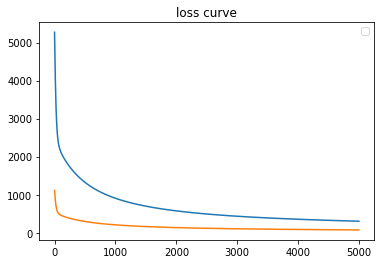

No handles with labels found to put in legend.


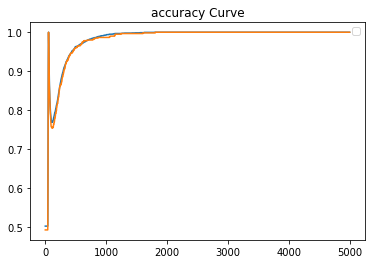

In [6]:
model = Neural_Network(2,1)
model.train(trainX, trainY, epochs = 5000, learningRate = 0.00001, validationX = validX, validationY = validY)

In [7]:
model.saveModel('bestmodelTask1')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [8]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('bestmodelTask1.npy')
# check accuracy of that model
mm.accuracy(testX,testY)


# error = 0.1




1.0